# Vui App Analytics and clustering employees
### Hoàng Tiến Đạt

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
employments = pd.read_excel("E:\\Documents\\vui app\\vui app.xlsx",sheet_name='employments')

In [ ]:
tenants = pd.read_excel("E:\\Documents\\vui app\\vui app.xlsx",sheet_name='tenants')

In [ ]:
loan_applications = pd.read_excel("E:\\Documents\\vui app\\vui app.xlsx",sheet_name='loan_applications')

In [ ]:
employments

,id,tenant_id,limitation_per_user
0,1,1,12000000
1,2,2,9000000
2,3,3,8000000
3,4,4,6000000
4,5,5,9000000
5,6,3,9500000
6,7,3,9900000
7,8,4,11000000
8,9,5,8000000
9,10,2,8500000


In [ ]:
tenants

,id,code,tenant_fee
0,1,A,0.20
1,2,B,0.25
2,3,C,0.24
3,4,D,0.22
4,5,E,0.23


In [ ]:
loan_applications

,id,employment_id,month,amount_value
0,1,1,2023-01-01,2000000
1,2,2,2023-01-01,2000000
2,3,3,2023-01-01,2000000
3,4,4,2023-01-01,4000000
4,5,5,2023-01-01,4000000
5,6,6,2023-01-01,4000000
6,7,7,2023-01-01,4000000
7,8,8,2023-01-01,4000000
8,9,9,2023-01-01,4000000
9,10,10,2023-01-01,3500000


**1.a Lợi nhuận thu của Vui App trong tháng 1 và tháng 2**

In [ ]:
loan_applications.drop(columns={'id'},inplace=True)
summary = loan_applications.merge(employments,left_on= 'employment_id',right_on='id',how='inner')
summary.drop(columns={'id'},inplace=True)
summary = summary.merge(tenants, left_on='tenant_id',right_on='id',how='inner')
summary.drop(columns={'id'},inplace=True)
summary['profit'] = summary['tenant_fee'] * summary['amount_value']

In [ ]:
profit = summary.groupby('month')['profit'].sum().reset_index(name= 'total_profit')
profit

,month,total_profit
0,2023-01-01,11800000.00
1,2023-02-01,12266406.37


In [ ]:
profit['month'] = profit['month'].dt.strftime('%B')
profit

,month,total_profit
0,January,11800000.00
1,February,12266406.37


Text(0.5, 1.0, 'Profit in two months')

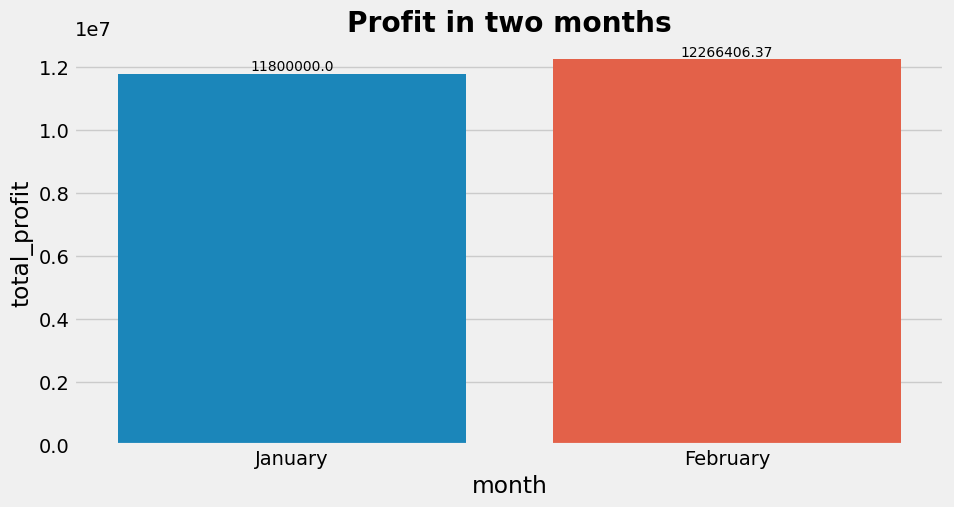

In [ ]:
import seaborn as sns 
fix, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data= profit,x= 'month',y='total_profit')
for p in ax.patches:
    height_value = round(p.get_height(), 2)
    ax.annotate(f'{height_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Profit in two months',fontweight ='bold')

# vậy Lợi nhuận tháng 1 là 11.800.000
#     Lợi nhuận tháng 2 là 12.266.406

**1.b Lợi nhuận từ từng khách hàng với Vui App trong tháng 1 và tháng 2**

In [ ]:
profit_per_employee = summary.groupby(['month','employment_id'])['profit'].sum().reset_index()
profit_per_employee

,month,employment_id,profit
0,2023-01-01,1,400000.00
1,2023-01-01,2,500000.00
2,2023-01-01,3,480000.00
3,2023-01-01,4,880000.00
4,2023-01-01,5,920000.00
5,2023-01-01,6,960000.00
6,2023-01-01,7,960000.00
7,2023-01-01,8,880000.00
8,2023-01-01,9,920000.00
9,2023-01-01,10,875000.00


Text(0, 0.5, 'Profit')

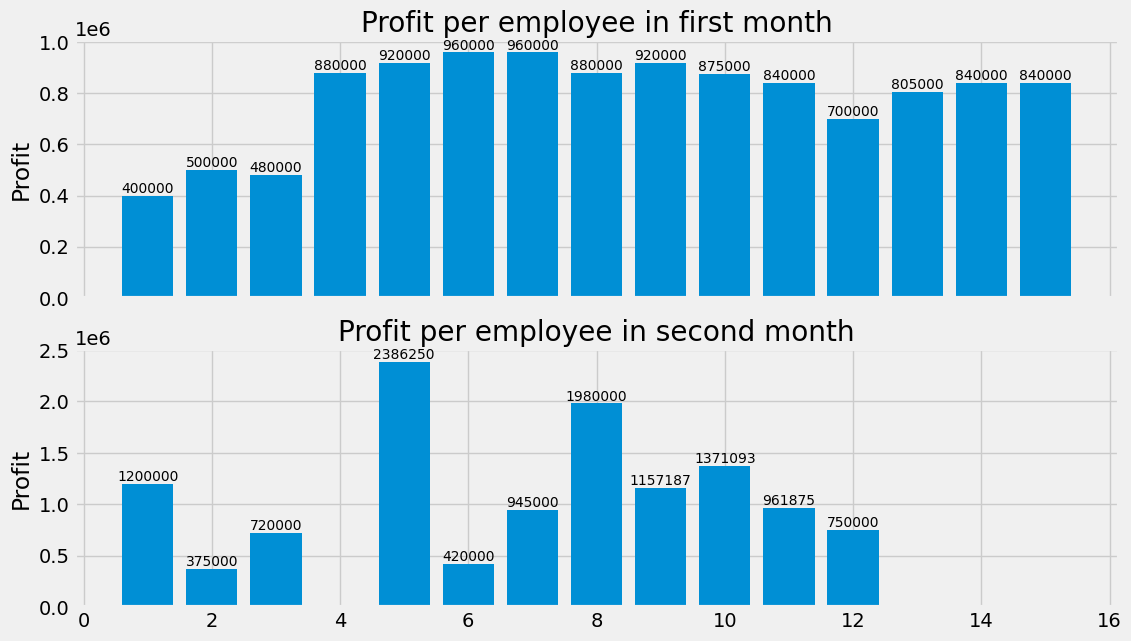

In [ ]:
fig, ax= plt.subplots(2,1,figsize=(12,7),sharex=True)
bar1 = ax[0].bar(profit_per_employee_T1['employment_id'],profit_per_employee_T1['profit'])
bar2 = ax[1].bar(profit_per_employee_T2['employment_id'],profit_per_employee_T2['profit'])

ax[0].bar_label(bar1,fmt='%d',label_type='edge',size= 10)
ax[1].bar_label(bar2,fmt='%d',label_type='edge',size= 10)

ax[0].set_title('Profit per employee in first month')
ax[1].set_title('Profit per employee in second month')

ax[0].set_ylabel('Profit')
ax[1].set_ylabel('Profit')

**2 Phân loại nhóm khách hàng và đề xuất phương án cải thiện doanh thu thông qua các chương trình khuyến mại**

In [ ]:
employment = summary.groupby('employment_id').agg({
    'employment_id': 'count',
    'amount_value': 'sum',
    'limitation_per_user': 'first'
}).reset_index(names='id')


In [ ]:
employment = employment.rename(columns={'employment_id':'frequency','amount_value':'monetary','limitation_per_user':'limitation'})

In [ ]:
employment['avg_monetary'] = employment['monetary']/employment['frequency']

In [ ]:
employment.dtypes

id                int64
frequency         int64
monetary          int64
limitation        int64
avg_monetary    float64
dtype: object

In [ ]:
employment['avg_monetary'] = employment['avg_monetary'].astype(int)
employment['avg_monetary'] = employment['avg_monetary'].apply(lambda x: "{:.0f}".format(x))
employment.drop(columns={'monetary'},inplace= True)
employment


,id,frequency,limitation,avg_monetary
0,1,2,12000000,4000000
1,2,2,9000000,1750000
2,3,2,8000000,2500000
3,4,1,6000000,4000000
4,5,4,9000000,3593750
5,6,2,9500000,2875000
6,7,2,9900000,3968750
7,8,2,11000000,6500000
8,9,3,8000000,3010416
9,10,3,8500000,2994791


In [ ]:
employment['avg_monetary'] = employment['avg_monetary'].astype(int)
employment.describe()

,id,frequency,limitation,avg_monetary
count,15.000000,15.000000,1.500000e+01,1.500000e+01
mean,8.000000,2.000000,9.000000e+06,3.538108e+06
std,4.472136,0.845154,1.381511e+06,1.025910e+06
min,1.000000,1.000000,6.000000e+06,1.750000e+06
25%,4.500000,1.500000,8.250000e+06,3.002604e+06
50%,8.000000,2.000000,9.000000e+06,3.500000e+06
75%,11.500000,2.000000,9.500000e+06,3.861328e+06
max,15.000000,4.000000,1.200000e+07,6.500000e+06


**Vậy ta sẽ dùng thuật toán machine learing K-Means để phân nhóm dựa trên 3 yếu tố chính:**
- Frequency: số lần người lao động sử dụng dịch vụ ứng lương trước
- Limitation: Số tiền tối đa mà ngời đó được ứng
- Avg_monetary: số tiền trung bình của người đó mỗi lần ứng

In [ ]:
X = employment.iloc[:,1:4].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [ ]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

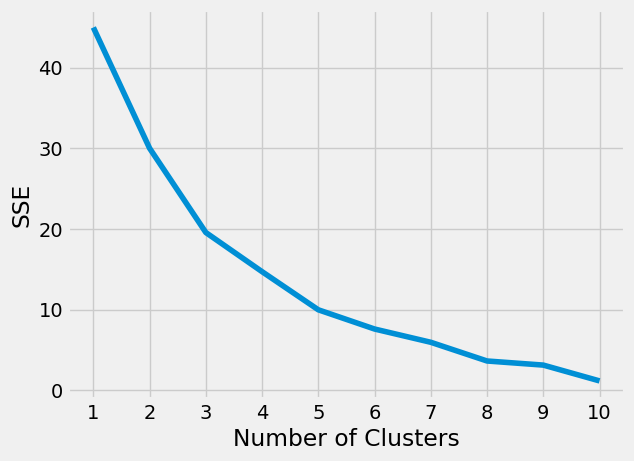

In [ ]:
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, init='random',n_init=10, random_state=42,max_iter=300)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

 plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl= KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
kl.elbow


3

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

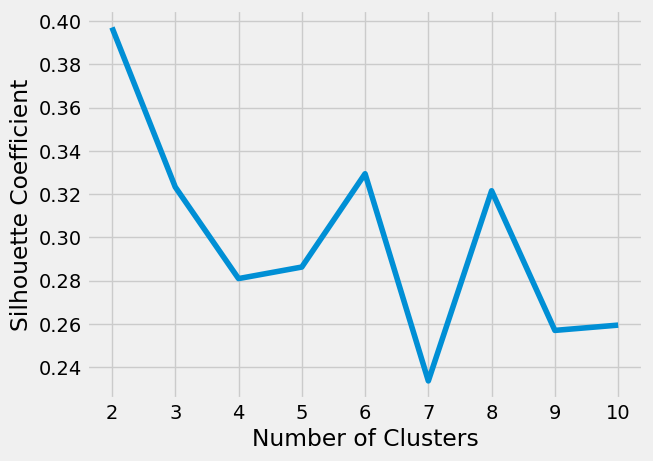

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, init='random',n_init=10, random_state=42,max_iter=300 )
 kmeans.fit(scaled_features)
 score = silhouette_score(scaled_features, kmeans.labels_)
 silhouette_coefficients.append(score)

 plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

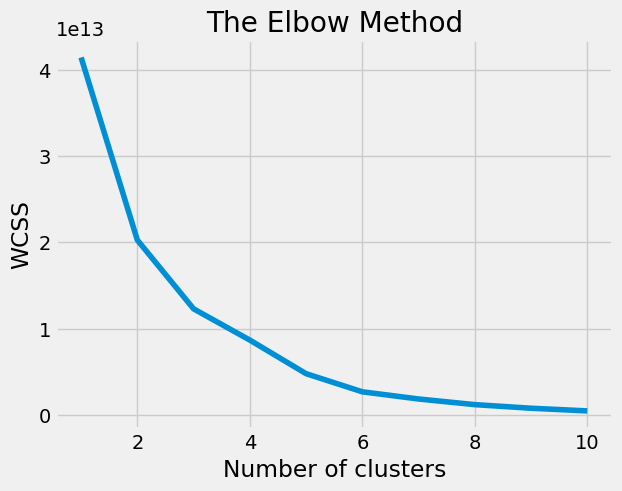

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data = employment.iloc[:,1:4]
data

,frequency,limitation,avg_monetary
0,2,12000000,4000000
1,2,9000000,1750000
2,2,8000000,2500000
3,1,6000000,4000000
4,4,9000000,3593750
5,2,9500000,2875000
6,2,9900000,3968750
7,2,11000000,6500000
8,3,8000000,3010416
9,3,8500000,2994791


In [ ]:
cluster_k3= data
kmeans_k3 = KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmeans = kmeans_k3.fit_predict(X)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
import plotly.express as px
cluster_k3['cluster_label'] = y_kmeans
fig = px.scatter_3d(cluster_k3, x='frequency', y='limitation', z='avg_monetary', color='cluster_label')
fig.show()

In [ ]:
cluster_k4= data
kmeans_k4 = KMeans(n_clusters=4,init="k-means++",random_state=42)
y_kmeans = kmeans_k4.fit_predict(X)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
cluster_k4['cluster_label'] = y_kmeans
fig = px.scatter_3d(cluster_k4, x='frequency', y='limitation', z='avg_monetary', color='cluster_label')
fig.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
cluster_k4[cluster_k4['cluster_label']==0].describe()

,frequency,limitation,avg_monetary,cluster_label
count,1.0,1.0,1.0,1.0
mean,2.0,12000000.0,4000000.0,0.0
std,NaN,NaN,NaN,NaN
min,2.0,12000000.0,4000000.0,0.0
25%,2.0,12000000.0,4000000.0,0.0
50%,2.0,12000000.0,4000000.0,0.0
75%,2.0,12000000.0,4000000.0,0.0
max,2.0,12000000.0,4000000.0,0.0


In [ ]:
cluster_k4[cluster_k4['cluster_label']==1].describe()

,frequency,limitation,avg_monetary,cluster_label
count,12.000000,1.200000e+01,1.200000e+01,12.0
mean,2.083333,8.833333e+06,3.214301e+06,1.0
std,0.900337,6.314965e+05,6.235657e+05,0.0
min,1.000000,8.000000e+06,1.750000e+06,1.0
25%,1.750000,8.375000e+06,2.964843e+06,1.0
50%,2.000000,9.000000e+06,3.500000e+06,1.0
75%,2.250000,9.125000e+06,3.601562e+06,1.0
max,4.000000,9.900000e+06,3.968750e+06,1.0


In [ ]:
cluster_k4[cluster_k4['cluster_label']==2].describe()

,frequency,limitation,avg_monetary,cluster_label
count,1.0,1.0,1.0,1.0
mean,1.0,6000000.0,4000000.0,2.0
std,NaN,NaN,NaN,NaN
min,1.0,6000000.0,4000000.0,2.0
25%,1.0,6000000.0,4000000.0,2.0
50%,1.0,6000000.0,4000000.0,2.0
75%,1.0,6000000.0,4000000.0,2.0
max,1.0,6000000.0,4000000.0,2.0


In [ ]:
cluster_k4[cluster_k4['cluster_label']==3].describe()

,frequency,limitation,avg_monetary,cluster_label
count,1.0,1.0,1.0,1.0
mean,2.0,11000000.0,6500000.0,3.0
std,NaN,NaN,NaN,NaN
min,2.0,11000000.0,6500000.0,3.0
25%,2.0,11000000.0,6500000.0,3.0
50%,2.0,11000000.0,6500000.0,3.0
75%,2.0,11000000.0,6500000.0,3.0
max,2.0,11000000.0,6500000.0,3.0


In [ ]:
cluster_k4

,frequency,limitation,avg_monetary,cluster_label
0,2,12000000,4000000,0
1,2,9000000,1750000,1
2,2,8000000,2500000,1
3,1,6000000,4000000,2
4,4,9000000,3593750,1
5,2,9500000,2875000,1
6,2,9900000,3968750,1
7,2,11000000,6500000,3
8,3,8000000,3010416,1
9,3,8500000,2994791,1


**Kết luận**
- Nhóm 1: Có limitaion lớn nhất 12 triệu, trung bình 2 lần sử dụng dịch vụ ứng tiền, trung bình mỗi lần 4 triệu, chiếm 30% thu nhập
- Nhóm 2: Có limitation ở mức trung bình với gần 9 triệu và trung bình 2,1 lần sử dụng dich vụ, mỗi lần khoảng 3,2 triệu, chiếm 35% thu nhập
- Nhóm 3: Có limitation thấp với chỉ 6 triệu, trung bình 1 lần sử dụng dịch vụ, mõi lần khoảng 4 triệu, chiếm lên đến 65% thu nhập
- Nhóm 4: Có limitation rất cao 11 triệu và trung bình 2 lần sử dụng dịch vụ, mỗi lần kên lên đến 6,5 triệu, chiếm gần 60% thu nhập